# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 598


['dana point',
 'tiksi',
 'olonkinbyen',
 'port-aux-francais',
 'wailua homesteads',
 'adamstown',
 'avarua',
 'slave lake',
 'waitangi',
 'iqaluit',
 'sogndal',
 'qalat',
 'carnarvon',
 'lihue',
 'tura',
 'aasiaat',
 'petropavlovsk-kamchatsky',
 'yuzhno-kurilsk',
 'bethel',
 'san pedro',
 'puerto natales',
 'nadym',
 'jamestown',
 'selfoss',
 'manacapuru',
 'taiohae',
 "cooper's town",
 'nemuro',
 'saipan',
 'badovinci',
 'vielha',
 'edinburgh of the seven seas',
 'lethem',
 'lata',
 'hadibu',
 'vorgashor',
 'kodiak',
 'qusmuryn',
 'dryden',
 'bilibino',
 'chegdomyn',
 'grytviken',
 'albany',
 'kulia village',
 'howrah',
 'hotan',
 'whitehorse',
 'mejit',
 'uige',
 'san pablo',
 'qamdo',
 'ta`u',
 'yellowknife',
 'ushuaia',
 'rojhan',
 'ribeira grande',
 'port elizabeth',
 'bredasdorp',
 'hawaiian paradise park',
 'tual',
 'okhotsk',
 'taksimo',
 'port moresby',
 'georgetown',
 'jalai nur',
 'utrik',
 'longyearbyen',
 'west island',
 'laikit, laikit ii (dimembe)',
 'belyy yar',
 'papa

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dana point
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | slave lake
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | sogndal
Processing Record 12 of Set 1 | qalat
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | aasiaat
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | yuzhno-kurilsk
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | san pedro
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | nadym
Processing Rec

Processing Record 39 of Set 4 | nurota
Processing Record 40 of Set 4 | punta arenas
Processing Record 41 of Set 4 | choyr
Processing Record 42 of Set 4 | asmara
Processing Record 43 of Set 4 | egilsstadir
Processing Record 44 of Set 4 | broken hill
Processing Record 45 of Set 4 | fuxin
Processing Record 46 of Set 4 | torghay
Processing Record 47 of Set 4 | pauri
Processing Record 48 of Set 4 | polyarnyy
Processing Record 49 of Set 4 | lazaro cardenas
Processing Record 0 of Set 5 | kingston
Processing Record 1 of Set 5 | vorkuta
Processing Record 2 of Set 5 | suoyarvi
Processing Record 3 of Set 5 | taco pozo
Processing Record 4 of Set 5 | alta
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | springs
Processing Record 7 of Set 5 | manggar
Processing Record 8 of Set 5 | narasannapeta
Processing Record 9 of Set 5 | kerikeri
Processing Record 10 of Set 5 | stafford
Processing Record 11 of Set 5 | bay harbor
Processing Record 12 of Set 5 | punta cardon
Processing Record

Processing Record 28 of Set 8 | kailua-kona
Processing Record 29 of Set 8 | ayorou
Processing Record 30 of Set 8 | la'ie
Processing Record 31 of Set 8 | terbanggi besar
Processing Record 32 of Set 8 | mahroni
Processing Record 33 of Set 8 | cannonvale
Processing Record 34 of Set 8 | beitbridge
Processing Record 35 of Set 8 | marka
Processing Record 36 of Set 8 | roudnice nad labem
Processing Record 37 of Set 8 | qasr-e qand
City not found. Skipping...
Processing Record 38 of Set 8 | sumbe
Processing Record 39 of Set 8 | tambura
Processing Record 40 of Set 8 | keflavik
Processing Record 41 of Set 8 | port shepstone
Processing Record 42 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 43 of Set 8 | ulladulla
Processing Record 44 of Set 8 | north shore
Processing Record 45 of Set 8 | dakhla
Processing Record 46 of Set 8 | pointe-noire
Processing Record 47 of Set 8 | mhasvad
Processing Record 48 of Set 8 | parry sound
Processing Record 49 of Set 8 | bardsir
Processing Rec

City not found. Skipping...
Processing Record 18 of Set 12 | phongsali
Processing Record 19 of Set 12 | brisas de zicatela
Processing Record 20 of Set 12 | madalena
Processing Record 21 of Set 12 | isabel segunda
Processing Record 22 of Set 12 | ulanhot
Processing Record 23 of Set 12 | nacala
Processing Record 24 of Set 12 | banda aceh
Processing Record 25 of Set 12 | bryne
Processing Record 26 of Set 12 | kazanskoye
Processing Record 27 of Set 12 | sparti
Processing Record 28 of Set 12 | baki
Processing Record 29 of Set 12 | union city
Processing Record 30 of Set 12 | greymouth
Processing Record 31 of Set 12 | karasburg
Processing Record 32 of Set 12 | yuncheng
Processing Record 33 of Set 12 | vernon
Processing Record 34 of Set 12 | karratha
Processing Record 35 of Set 12 | inderbor
Processing Record 36 of Set 12 | harper
Processing Record 37 of Set 12 | el granada
Processing Record 38 of Set 12 | santa marta
Processing Record 39 of Set 12 | urangan
Processing Record 40 of Set 12 | ra

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dana point,33.4670,-117.6981,290.82,92,39,0.89,US,1684164581
1,tiksi,71.6872,128.8694,271.89,96,100,2.95,RU,1684164581
2,olonkinbyen,70.9221,-8.7187,272.78,97,100,9.62,SJ,1684164581
3,port-aux-francais,-49.3500,70.2167,278.65,72,23,13.77,TF,1684164581
4,wailua homesteads,22.0669,-159.3780,294.59,82,100,5.14,US,1684164581


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dana point,33.4670,-117.6981,290.82,92,39,0.89,US,1684164581
1,tiksi,71.6872,128.8694,271.89,96,100,2.95,RU,1684164581
2,olonkinbyen,70.9221,-8.7187,272.78,97,100,9.62,SJ,1684164581
3,port-aux-francais,-49.3500,70.2167,278.65,72,23,13.77,TF,1684164581
4,wailua homesteads,22.0669,-159.3780,294.59,82,100,5.14,US,1684164581


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

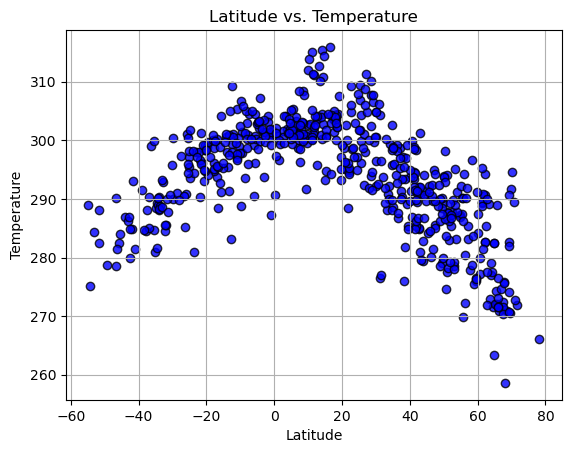

In [11]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df["Lat"]
y_value = city_data_df["Max Temp"]

plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black", alpha=0.80)

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

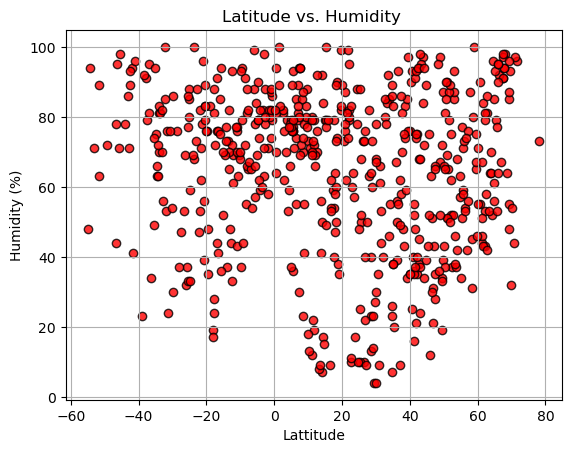

In [14]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df["Lat"]
y_value = city_data_df["Humidity"]


plt.scatter(x_value, y_value, marker="o", facecolors="red", edgecolors="black", alpha=0.80)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity ")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

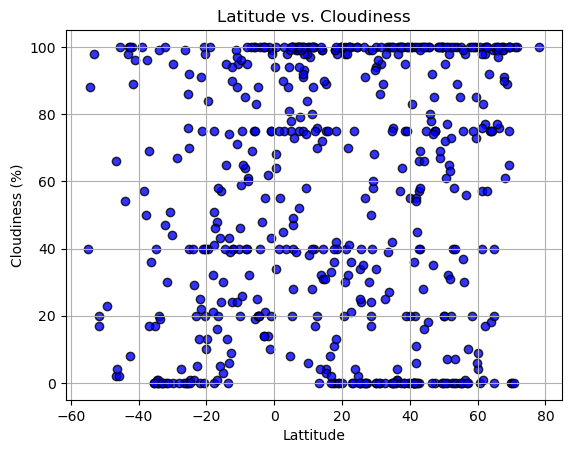

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df["Lat"]
y_value = city_data_df["Cloudiness"]

plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black", alpha=0.80)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

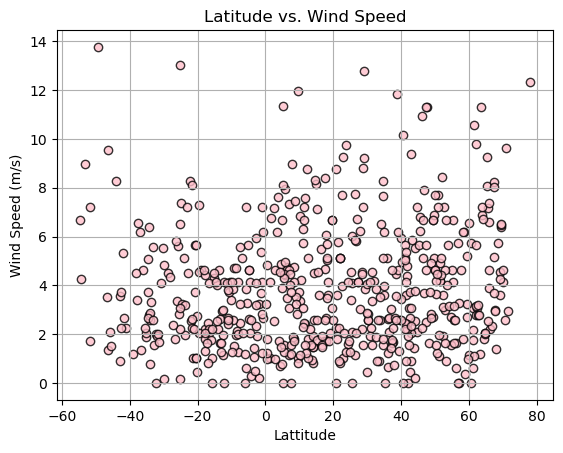

In [20]:
x_value = city_data_df["Lat"]
y_value = city_data_df["Wind Speed"]

plt.scatter(x_value, y_value, marker="o", facecolors="pink", edgecolors="black", alpha=0.80)
# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:

# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#r_squared = round(rvalue**2,2)
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dana point,33.4670,-117.6981,290.82,92,39,0.89,US,1684164581
1,tiksi,71.6872,128.8694,271.89,96,100,2.95,RU,1684164581
2,olonkinbyen,70.9221,-8.7187,272.78,97,100,9.62,SJ,1684164581
4,wailua homesteads,22.0669,-159.3780,294.59,82,100,5.14,US,1684164581
7,slave lake,55.2834,-114.7690,290.14,51,0,4.12,CA,1684164582


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,278.65,72,23,13.77,TF,1684164581
5,adamstown,-25.0660,-130.1015,297.19,85,92,13.02,PN,1684164582
6,avarua,-21.2078,-159.7750,296.18,78,75,1.03,CK,1684164582
8,waitangi,-43.9535,-176.5597,286.98,78,54,8.27,NZ,1684164582
12,carnarvon,-24.8667,113.6333,293.64,59,1,7.37,AU,1684164583


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7969452200538183


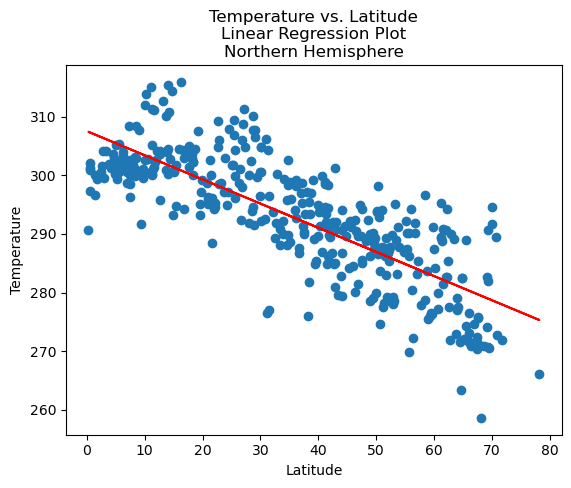

In [65]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
print(f'The r-value is: {rvalue}')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature vs. Latitude\nLinear Regression Plot\nNorthern Hemisphere')
plt.show()


The r-value is: 0.7707280995721866


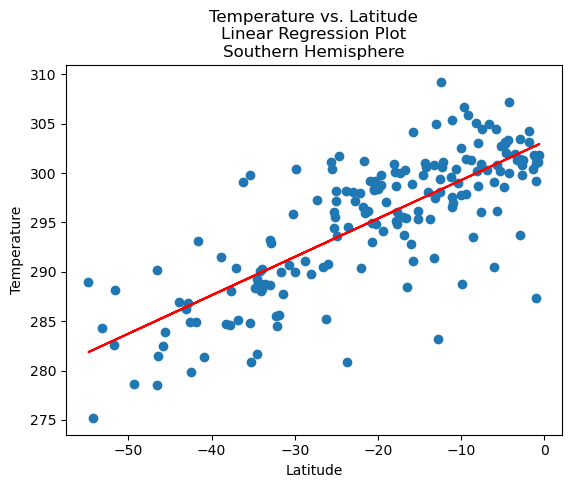

In [66]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The r-value is: {rvalue}')
sline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(sline_eq,(-35,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature vs. Latitude\nLinear Regression Plot\nSouthern Hemisphere')
plt.show()

**Discussion about the linear relationship:** The above plots are linear regression model between Maximum tempreture and latitude for Northern and Southern Hemisphere cities. The result from the data showed that there is a strong, negative correlation between Maximum tempreture and latitude in the northern hemisphere. These means when we go farther away from the equater(latitude 0) the maximum Temperature (F) will decrease. However the reverse is the case in the southern hemisphere cities.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.014216326444113367


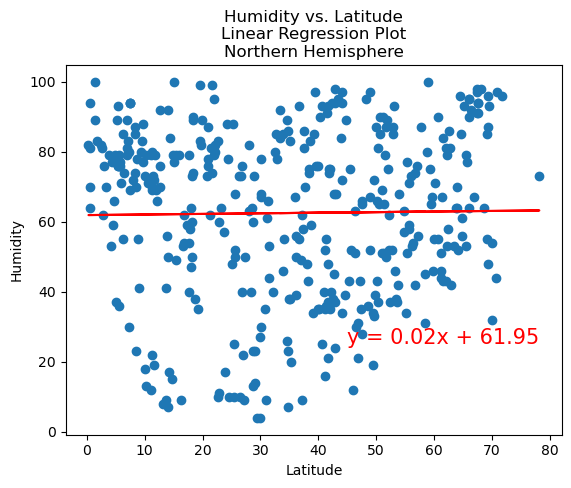

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude\nLinear Regression Plot\nNorthern Hemisphere')
plt.show()

The r-value is: 0.005409746491235176


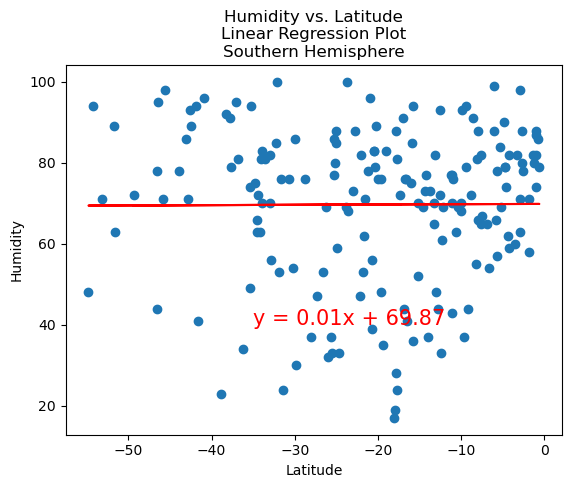

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
sline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(sline_eq,(-35,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude\nLinear Regression Plot\nSouthern Hemisphere')
plt.show()

**Discussion about the linear relationship:** The above plots are linear regression model between Humidity (%) and Latitude for Northern and Southern Hemisphere cities. The result from the data showed that latitude increases as Humidity increase but there is a very week positive correlation between Humidity (%) and Latitude in the Northern Hemisphere cities and more weaker positive correlation between Humidity (%) and Latitude in the Southern Hemisphere cities.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.01696523058466187


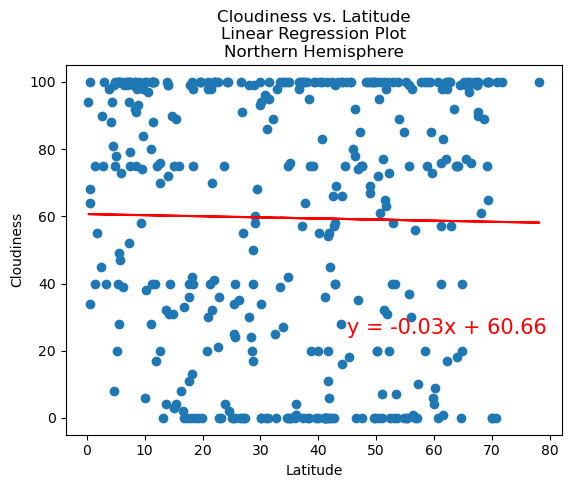

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude\nLinear Regression Plot\nNorthern Hemisphere')
plt.show()

The r-value is: 0.1428708989776846


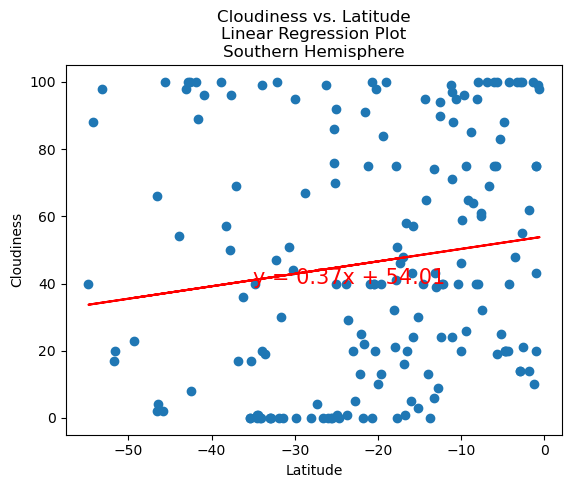

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
sline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(sline_eq,(-35,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude\nLinear Regression Plot\nSouthern Hemisphere')
plt.show()

**Discussion about the linear relationship:** The above plot is a linear regression model between Cloudiness (%) and Latitude for Northern and Southern Hemisphere cities. The result from the data showed that there is a very weak, almost none negative correlation between Cloudiness (%) and Latitude in the Northern Hemisphere cities and a weak positve correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08607515989468276


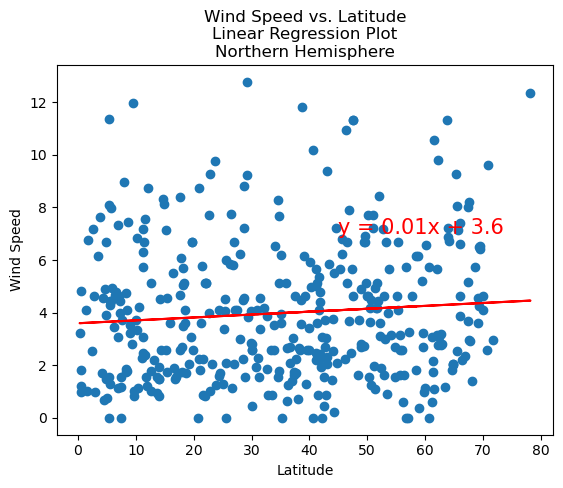

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude\nLinear Regression Plot\nNorthern Hemisphere')
plt.show()

The r-value is: -0.20581229027456724


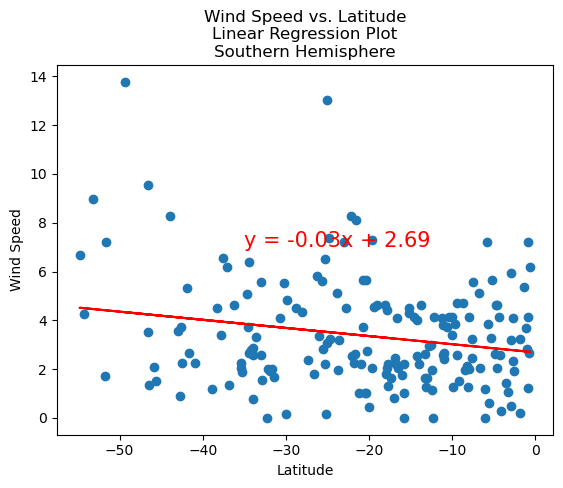

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
sline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(sline_eq,(-35,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude\nLinear Regression Plot\nSouthern Hemisphere')
plt.show()


**Discussion about the linear relationship:** The above plot is a linear regression model between Wind Speed (mph), and latitude for Northern and Southern Hemisphere cities. The result from the data showed that there is a very week, positive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities and a negative correlation between Wind Speed (mph (%) and Latitude in the Southern Hemisphere cities